In [35]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd

def load_data():
    df = pd.read_csv('../data/MLParamData_1583906408.4261804_From_MLrn_2020-03-10+00_00_00_to_2020-03-11+00_00_00.h5_processed.csv.gz')
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df.dropna(axis=0)
    return df

df = load_data()

In [13]:
df['B:VIMIN_MEAN'] = df['B:VIMIN'].rolling(window=15).mean()
df['B:VIMIN_STD']  = df['B:VIMIN'].rolling(window=15).std()
df['B:IMINER_STD'] = df['B:IMINER'].rolling(window=15).std()
df['I:IB_MEAN'] = df['I:IB'].rolling(window=15).mean()


NameError: name 'BIMINER_linear' is not defined

103.39315796


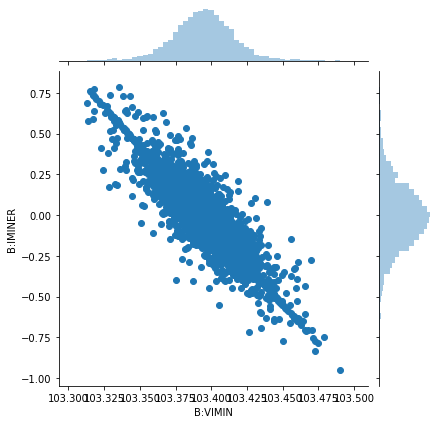

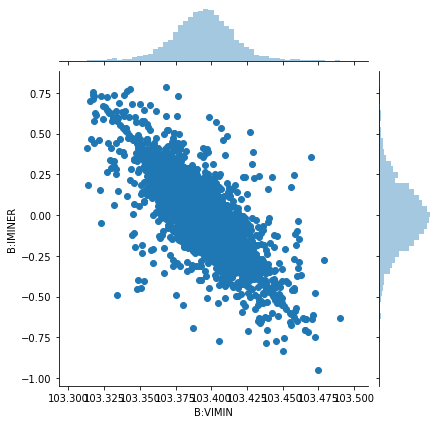

In [36]:
#####################################
## PLOT BASIC CORRELATION FUNCTION ##
#####################################
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_s = df.sample(5000)

var_list = ["B:VIMIN", "I:IB", "B:LINFRQ"]
#for i in range(len(var_list)):
#  sns.jointplot(x=df["B:VIMIN"][0:5000], y=df["B:IMINER"][1:5001], kind='scatter')
sns.jointplot(x=df["B:VIMIN"][0:5000], y=df["B:IMINER"][0:5000], kind='scatter')  
sns.jointplot(x=df["B:VIMIN"][1:5001], y=df["B:IMINER"][0:5000], kind='scatter')  
#sns.jointplot(x=df["B_VIMIN"][0:5000], y=df["B:VIMIN"][0:5000], kind='scatter')

print(df["B_VIMIN"][0])


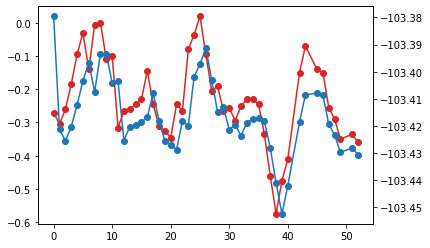

In [34]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df_plot=df[0:50]
ax1.plot(df_plot["B:IMINER"],color='tab:red',marker="o")
ax2.plot(-df_plot["B:VIMIN"],color='tab:blue',marker="o")



In [29]:
print(df_plot["B:IMINER"].shift(-1))
print(df_plot["B:IMINER"])

0    -0.305312
1    -0.260313
2    -0.185312
3    -0.095312
4    -0.030312
5    -0.140313
6    -0.005313
7    -0.000313
8    -0.110312
9    -0.100312
10   -0.315312
11   -0.265313
12   -0.260313
13   -0.245312
14   -0.230313
15   -0.145313
16   -0.245312
17   -0.310312
18   -0.325313
19   -0.345313
20   -0.245312
21   -0.265313
22   -0.080312
23   -0.035312
24    0.019688
25   -0.095312
26   -0.205313
27   -0.190312
28   -0.265313
29   -0.255312
30   -0.295312
31   -0.250312
32   -0.230313
33   -0.230313
34   -0.245312
35   -0.335313
36   -0.460313
37   -0.575313
38   -0.475313
39   -0.410313
40   -0.150312
42   -0.070312
43   -0.140313
45   -0.150312
46   -0.255312
47   -0.290312
48   -0.350313
49   -0.335313
51   -0.360312
52         NaN
Name: B:IMINER, dtype: float64
0    -0.270313
1    -0.305312
2    -0.260313
3    -0.185312
4    -0.095312
5    -0.030312
6    -0.140313
7    -0.005313
8    -0.000313
9    -0.110312
10   -0.100312
11   -0.315312
12   -0.265313
13   -0.260313
14   -0.2

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


m= -4.169628698478857
b= 431.20556091216764
5000
5000


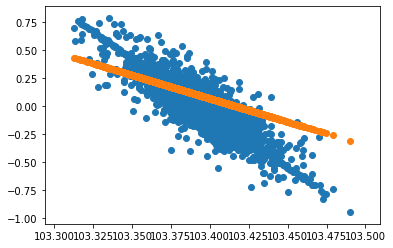

In [8]:
##use linear regression to fit
import statsmodels.api as sm
length=5000
X=df["B:VIMIN"]
y=df["B:IMINER"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
model.summary()
#print(model.params)
b=model.params['const']
m=model.params['B:VIMIN']
print("m=",m)
print("b=",b)

print(len(X[0:length]))
print(len(y[0:length]))
plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length])
#y_pred = m*df["B:VIMIN"]+b
plt.scatter(x=df["B:VIMIN"][0:length],y=y_pred[0:length])

103.30489349 103.49038696
0.8546875 -0.9503125
m=  -9.730800766194232
b=  1006.0940242241055


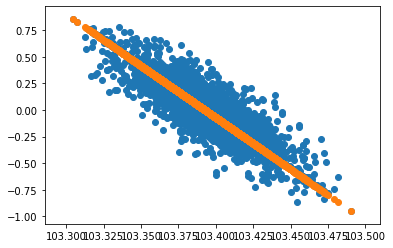

In [9]:
##use 2 points to fit the linear line
##fits better

length=10000
x_min=df["B:VIMIN"][0:length].min()
x_max=df["B:VIMIN"][0:length].max()
y_min=df[df["B:VIMIN"]==x_min]["B:IMINER"].max()
y_max=df[df["B:VIMIN"]==x_max]["B:IMINER"].min()

print(x_min,x_max)
print(y_min,y_max)

m=(y_min-y_max)/(x_min-x_max)
b=y_min-m*x_min
print("m= ",m)
print("b= ",b)

import matplotlib.pyplot as plt
plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length])
X = df["B:VIMIN"]
y_pred = m*X+b
plt.scatter(x=df["B:VIMIN"][0:length],y=y_pred[0:length])

In [14]:


import random
def BIMINER_linear(x):
  m=-9.730800766194232
  b=1006.0940242241055
  y=m*x+b
  return y

def random_from_cdf(std):
  #print(std)
  hist, bins = np.histogram(std, bins=100)
  #print(hist)
  #print(bins)
  bin_midpoints = bins[:-1] + np.diff(bins)/2
  
  #print("hist")
  cdf = np.cumsum(hist)
  #print(hist)
  cdf = cdf / cdf[-1]
  values = np.random.rand(len(std)*10)
  value_bins = np.searchsorted(cdf, values)
  random_from_cdf = bin_midpoints[value_bins]
  return random_from_cdf


def randomStd(x,df):
  #filter according to x-axis: return air flow
  y_std=df[df["B:VIMIN"]>x-0.005]
  y_std=y_std[y_std["B:VIMIN"]<x+0.005]
  # get the y-axis value according to the filtering
  y_std=y_std["IMINER_std"] # should get the supply air flow
  return y_std

def BIMINER(x,df):
  y=BIMINER_linear(x)
  y_std = randomStd(x,df) #get the window: Nino should return the return air flow rate

  r=random_from_cdf(y_std)
  if len(r)>0:
    i=random.randint(0,len(r)-1)
    return y+r[i]
  else:
    return y

  
a=BIMINER_linear(df["B:VIMIN"])
df["IMINER_linear"]=BIMINER_linear(df["B:VIMIN"])
df["IMINER_std"]=df["B:IMINER"]-df["IMINER_linear"]
y_pred=BIMINER(103.475,df[:5000])

print(y_pred)



-0.792360027030149


In [15]:



y=BIMINER_linear(103.475)
y_std = randomStd(103.475,df[:5000])

#hist, bins = np.histogram(y_std, bins=100)

#plt.hist(y_std,100)
r=random_from_cdf(y_std)
import random
i=random.randint(0,len(r)-1)
print(r[i])

0.008225030812419036


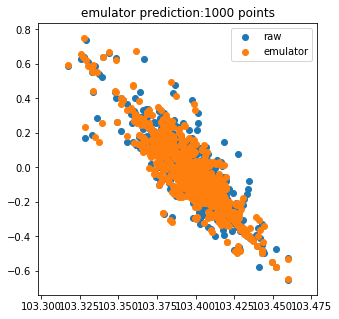

In [16]:
## Statistic emulator outputs

length=1000
X=df["B:VIMIN"][0:length]
output=[]
for x in X:
  #print(x)
  y=BIMINER(x,df[0:length])
  output.append(y)
  
  
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length],label="raw")
plt.scatter(X,output,label="emulator")

plt.title('emulator prediction:'+str(length)+' points')
plt.legend()

667262


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'emulator prediction:1000 points')

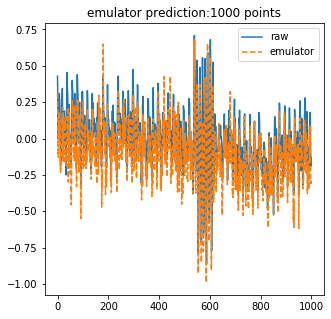

In [367]:
#time series emulator output
duration=1000
start = np.random.randint(0,len(df["B:VIMIN"])-1)
print(start)
X=df["B:VIMIN"][start:start+duration]
Y=df["B:IMINER"][start:start+duration]
output=[]
for x in X:
  #print(x)
  y=BIMINER(x,df[0:length])
  output.append(y)

#print(y.tolist()) 
#print(output)
plt.plot(Y.tolist(),label='raw')
plt.plot(output,label='emulator',linestyle='dashed')
plt.legend()
plt.title('emulator prediction:'+str(duration)+' points')

In [58]:
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, Matern, Sum, Product
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
noise = 1e-3
wn_kernel = C(1.0, (1e-2, 1e3)) * WhiteKernel()
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5) * WhiteKernel()
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise**2)
X=df["B:VIMIN"][0:5000]
Y=df["B:IMINER"][0:5000]
gpr.fit([X],[Y])
## Then predict
y_pred, MSE = gpr.predict([X], return_std=True)
print(y_pred[0])

import matplotlib.pyplot as plt
plt.plot(Y,label="true")
plt.plot(y_pred[0],label="predict")

[0. 0. 0. ... 0. 0. 0.]


[0. 0. 0. ... 0. 0. 0.]


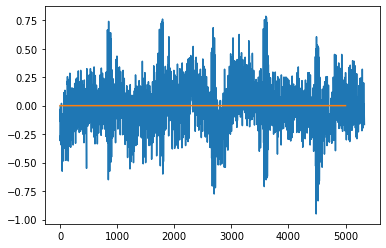